In [1]:
# Titanic Survival Prediction
# 1. Import Libraries
import pandas as pd        # Data handling
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns      # Statistical visualizations

from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import LabelEncoder         # Encoding categorical features
from sklearn.impute import SimpleImputer               # Handling missing values
from sklearn.ensemble import RandomForestClassifier    # Random Forest model
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree model & visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics



In [3]:
# 2. Load Data
train_df = pd.read_csv('titanic_train.csv')  # Load training data
test_df = pd.read_csv('titanic_test.csv')    # Load test data


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title  FamilySize  IsAlone  
0      0         A/5 21171   7.2500   NaN        S    Mr           2        0  
1      0          PC 17599  71.2833   C85        C   Mrs           2        0  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss           1        1  


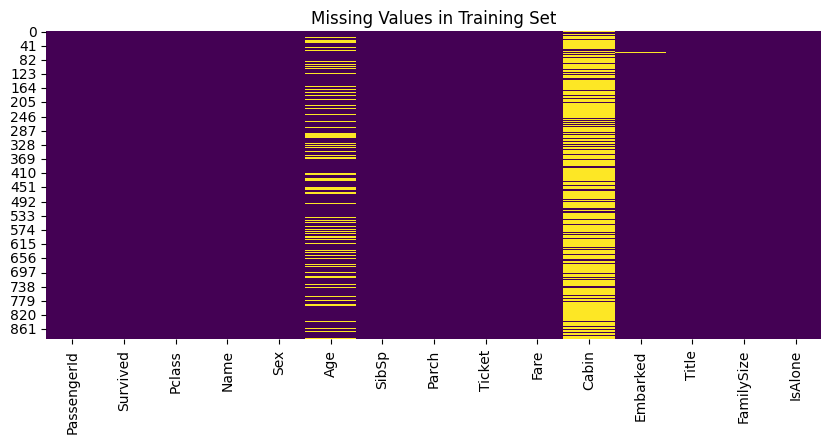

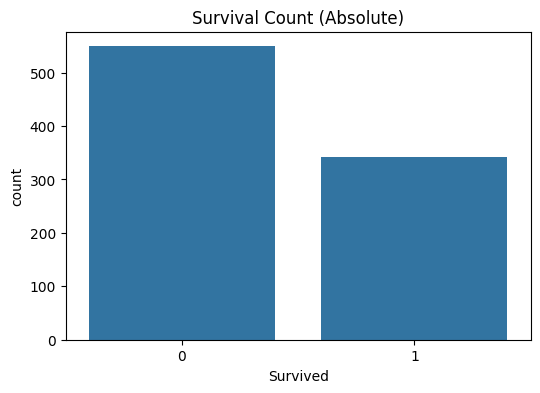

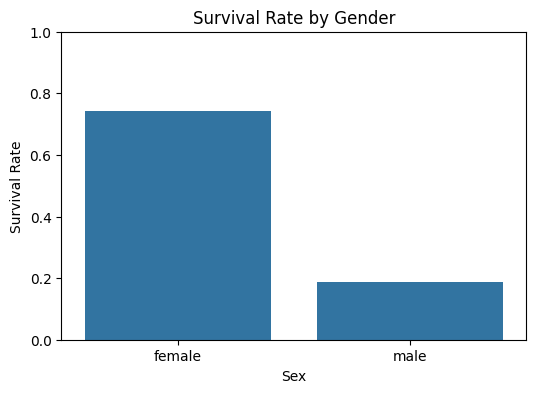

C:\Users\niral\AppData\Local\Temp\ipykernel_21816\3451708625.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_survival.index, y=pclass_survival.values, palette='coolwarm')


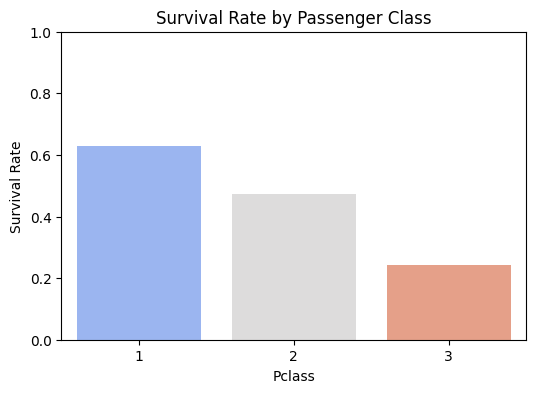

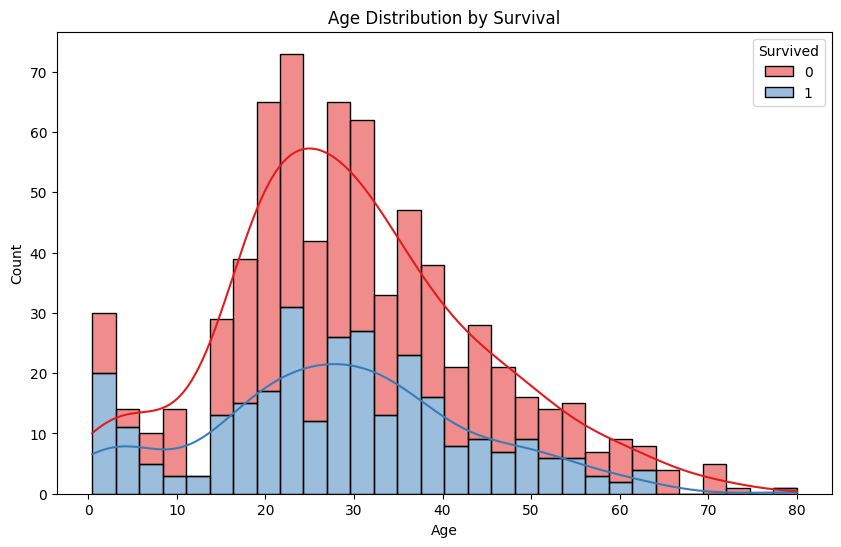

C:\Users\niral\AppData\Local\Temp\ipykernel_21816\3451708625.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = train_df.groupby('AgeGroup')['Survived'].mean()
C:\Users\niral\AppData\Local\Temp\ipykernel_21816\3451708625.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agegroup_survival.index, y=agegroup_survival.values, palette='magma')


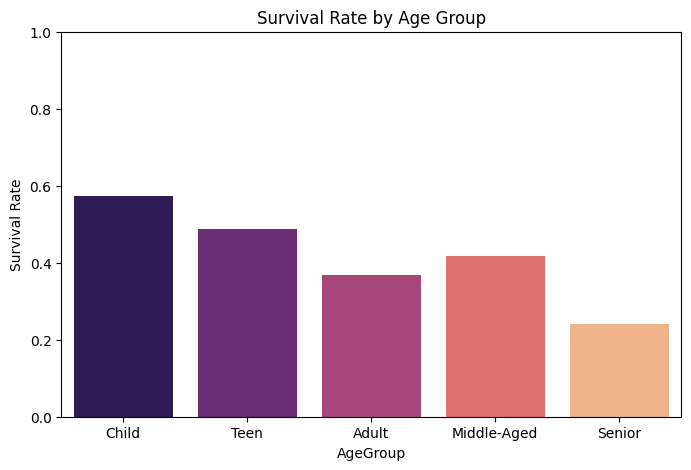

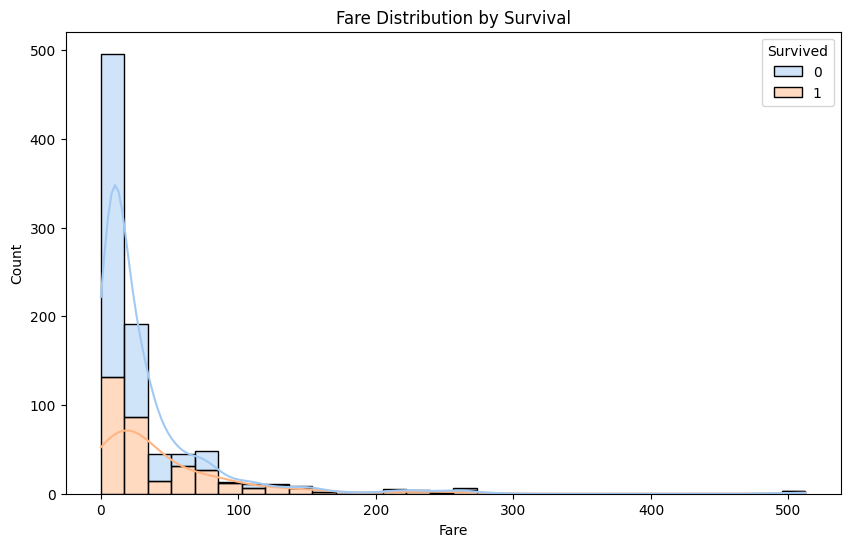

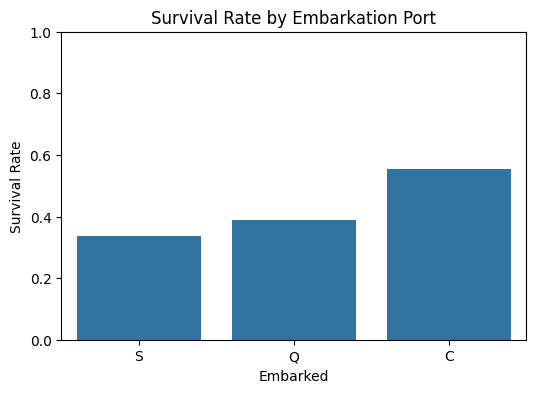

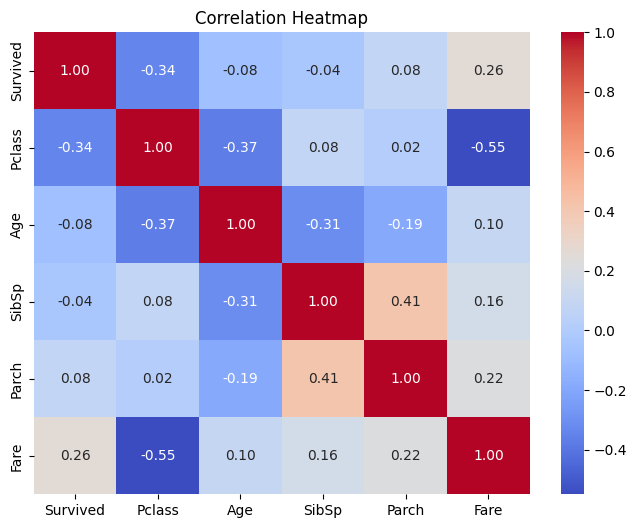

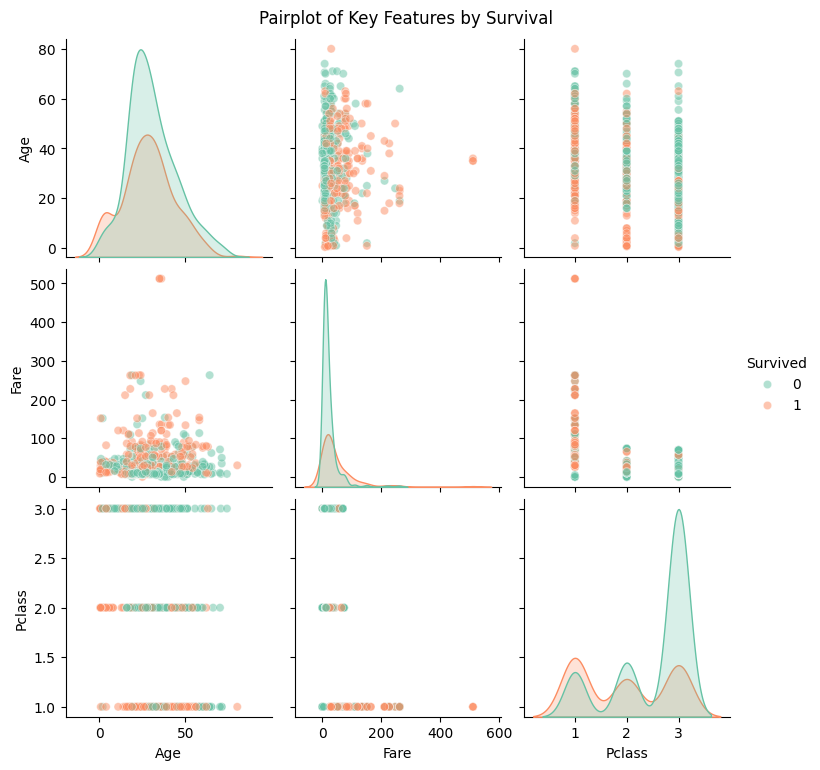

In [24]:
# 3. Exploratory Data Analysis (EDA)
# -----------------------------------

# View first few rows and info
print(train_df.head())
print(train_df.info())

# Visualize missing values heatmap
plt.figure(figsize=(10,4))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Set')
plt.show()

# Survival counts (absolute)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count (Absolute)')
plt.show()

# Survival rate by Gender (percentage)
gender_survival = train_df.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.ylim(0,1)
plt.show()

# Survival rate by Passenger Class (percentage)
pclass_survival = train_df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=pclass_survival.index, y=pclass_survival.values, palette='coolwarm')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0,1)
plt.show()

# Age Distribution with survival overlay
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack', palette='Set1')
plt.title('Age Distribution by Survival')
plt.show()

# Create Age Groups for clearer insights
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# Survival rate by Age Group
agegroup_survival = train_df.groupby('AgeGroup')['Survived'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=agegroup_survival.index, y=agegroup_survival.values, palette='magma')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.ylim(0,1)
plt.show()

# Fare distribution by Survival
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, kde=True, multiple='stack', palette='pastel')
plt.title('Fare Distribution by Survival')
plt.show()

# Survival by Embarked (Port of Embarkation)
embarked_survival = train_df.groupby('Embarked')['Survived'].mean().sort_values()
plt.figure(figsize=(6,4))
sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Port')
plt.ylim(0,1)
plt.show()

# Correlation Heatmap of numeric features
plt.figure(figsize=(8,6))
corr = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot with key features colored by survival
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', palette='Set2', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Key Features by Survival', y=1.02)
plt.show()


In [26]:
# 4. Feature Engineering
# ----------------------

# Extract title from name (Mr, Miss, etc.)
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Combine rare titles into 'Other'
title_counts = train_df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Other')
test_df['Title'] = test_df['Title'].replace(rare_titles, 'Other')

# Create new features: FamilySize and IsAlone
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


In [27]:
# 5. Data Preprocessing
# ----------------------

# Selected features for model
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']

# Combine train and test to apply consistent encoding
combined = pd.concat([train_df[features], test_df[features]], axis=0)

# Encode categorical columns
for col in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))

# Split back processed data into train and test
train_processed = combined.iloc[:len(train_df), :].copy()
test_processed = combined.iloc[len(train_df):, :].copy()

# Handle missing values using median strategy
imputer = SimpleImputer(strategy='median')
train_processed = pd.DataFrame(imputer.fit_transform(train_processed), columns=train_processed.columns)
test_processed = pd.DataFrame(imputer.transform(test_processed), columns=test_processed.columns)

# Define features (X) and target (y)
X = train_processed
y = train_df['Survived']


In [28]:
# 6. Train-Test Split
# --------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# 7. Random Forest Classifier
# ----------------------------
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_val)

# Evaluate Random Forest
print('--- Random Forest Classification ---')
print('Accuracy:', accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred))



--- Random Forest Classification ---
Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



--- Decision Tree Classification ---
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



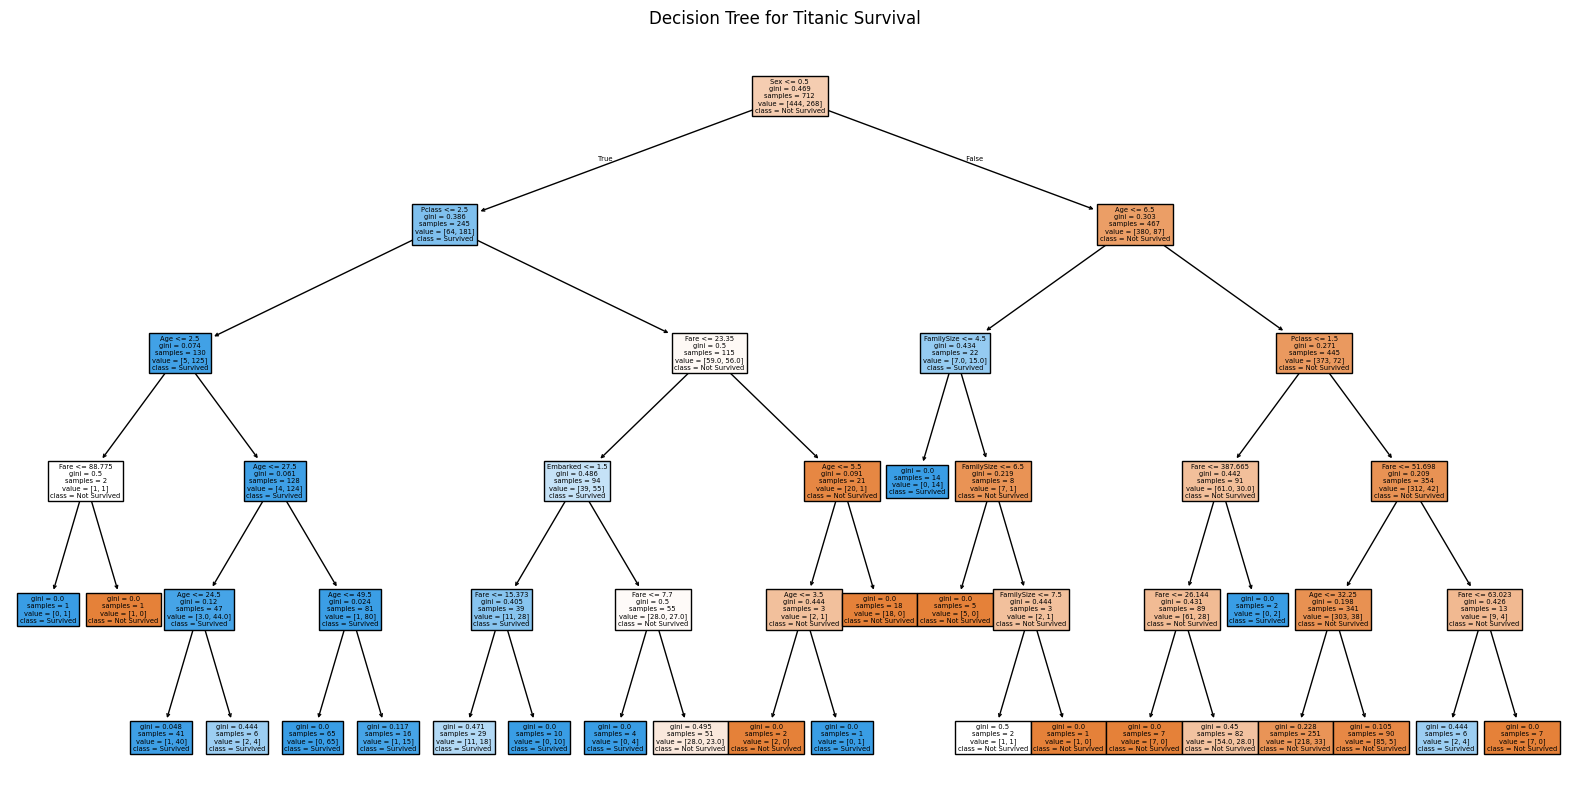

In [30]:
# 8. Decision Tree Classifier
# ----------------------------
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_val)

# Evaluate Decision Tree
print('--- Decision Tree Classification ---')
print('Accuracy:', accuracy_score(y_val, dt_pred))
print(classification_report(y_val, dt_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree for Titanic Survival')
plt.show()



In [ ]:
# Analysis: Who Survived?

# Create a DataFrame with predictions and actual features for interpretation
val_results = X_val.copy()
val_results['Actual'] = y_val.values
val_results['Predicted'] = dt_pred

# Map back encoded values to readable labels
val_results['Sex'] = val_results['Sex'].map({0: 'female', 1: 'male'})
val_results['Embarked'] = val_results['Embarked'].map({0: 'S', 1: 'C', 2: 'Q'})

# Add Age Group category
val_results['AgeGroup'] = pd.cut(val_results['Age'], bins=[0, 12, 18, 40, 60, 100],
                                 labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# --- Print survival interpretation ---

print('\n--- Survival by Gender ---')
print(val_results.groupby('Sex')['Predicted'].value_counts(normalize=True).unstack().round(2))

print('\n--- Survival by Passenger Class (Pclass) ---')
print(val_results.groupby('Pclass')['Predicted'].value_counts(normalize=True).unstack().round(2))

print('\n--- Survival by Age Group ---')
print(val_results.groupby('AgeGroup')['Predicted'].value_counts(normalize=True).unstack().round(2))



--- Survival by Gender ---
Predicted     0     1
Sex                  
female     0.19  0.81
male       0.98  0.02

--- Survival by Passenger Class (Pclass) ---
Predicted     0     1
Pclass               
1.0        0.55  0.45
2.0        0.48  0.52
3.0        0.82  0.18

--- Survival by Age Group ---
Predicted       0     1
AgeGroup               
Child        0.64  0.36
Teen         0.47  0.53
Adult        0.70  0.30
Middle-Aged  0.65  0.35
Senior       0.88  0.12


C:\Users\niral\AppData\Local\Temp\ipykernel_21816\3947948545.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(val_results.groupby('AgeGroup')['Predicted'].value_counts(normalize=True).unstack().round(2))


In [23]:
# 9. Summary Reflection and Insight
'''
The Decision Tree model for predicting Titanic passenger survival achieved an accuracy of approximately 80%, indicating reasonably good performance on the validation dataset. 
The model's predictions reveal that gender played a crucial role in survival chances: 81% of females were predicted to survive, compared to only 2% of males, highlighting a strong gender-based disparity consistent with the "women and children first" policy. 
In terms of passenger class, survival was highest among second-class passengers (52%), followed by first-class (45%), and was the lowest in third-class (18%), suggesting that economic status had a significant influence on survival. 
Age also impacted survival: teenagers had the highest survival rate (53%), followed by children (36%), while seniors (12%) were the least likely to survive. 
Adults and middle-aged individuals had moderate survival rates at 30% and 35%, respectively. 
Overall, the model identifies female gender, younger age, and higher class as strong predictors of survival, closely aligning with historical accounts of the Titanic disaster.

'''

'\nThe Decision Tree model for predicting Titanic passenger survival achieved an accuracy of approximately 80%, indicating reasonably good performance on the validation dataset. \nThe model\'s predictions reveal that gender played a crucial role in survival chances: 81% of females were predicted to survive, compared to only 2% of males, highlighting a strong gender-based disparity consistent with the "women and children first" policy. \nIn terms of passenger class, survival was highest among second-class passengers (52%), followed by first-class (45%), and was the lowest in third-class (18%), suggesting that economic status had a significant influence on survival. \nAge also impacted survival: teenagers had the highest survival rate (53%), followed by children (36%), while seniors (12%) were the least likely to survive. \nAdults and middle-aged individuals had moderate survival rates at 30% and 35%, respectively. \nOverall, the model identifies female gender, younger age, and higher cl